In [1]:
from google.colab import files

uploaded = files.upload()
video_path = list(uploaded.keys())[0]
print(f"Uploaded file: {video_path}")


Saving parking.mp4 to parking.mp4
Uploaded file: parking.mp4


In [2]:
import cv2
import numpy as np

cap = cv2.VideoCapture(video_path)
frames = []

if not cap.isOpened():
    print("Error opening video file")
else:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (224, 224))
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

cap.release()
frames = np.array(frames) / 255.0

print(f"Total Frames Processed: {len(frames)}")


Total Frames Processed: 607


In [3]:

labels = np.random.randint(0, 2, len(frames))
print(f"Label Distribution: Legal={np.sum(labels==0)}, Illegal={np.sum(labels==1)}")


Label Distribution: Legal=317, Illegal=290


In [4]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(frames, labels, test_size=0.2, random_state=42)

print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")


Training Samples: 485, Testing Samples: 122


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=16)


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.4958 - loss: 1.5730 - val_accuracy: 0.5410 - val_loss: 0.6931
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.4859 - loss: 0.6933 - val_accuracy: 0.5410 - val_loss: 0.6930
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.5161 - loss: 0.6929 - val_accuracy: 0.5410 - val_loss: 0.6926
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.4948 - loss: 0.6933 - val_accuracy: 0.5410 - val_loss: 0.6923
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5348 - loss: 0.6928 - val_accuracy: 0.5410 - val_loss: 0.6921
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.4921 - loss: 0.6939 - val_accuracy: 0.5410 - val_loss: 0.6922
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5286 - loss: 0.6925 - val_accuracy: 0.5410 - val_loss: 0.6922
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.4932 - loss: 0.6934 - val_accuracy: 0.5410 - val_loss:

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step


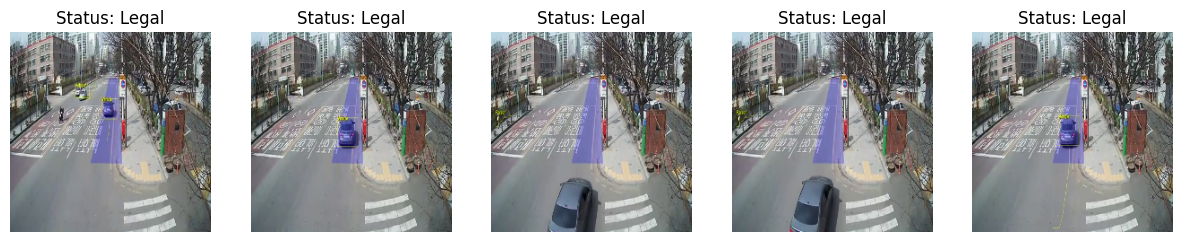

In [9]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, ax in enumerate(axes):
    ax.imshow(X_test[i])
    ax.set_title(f"Status: {'Illegal' if predictions[i] == 1 else 'Legal'}")
    ax.axis('off')

plt.show()
